<a href="https://colab.research.google.com/github/TuanAnh0304/DoAnGiuaKi_python/blob/main/Feature_Matrix_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Output dự đoán: [[0.54929951]
 [0.49085451]
 [0.81246811]
 [0.74188445]
 [0.69115645]]


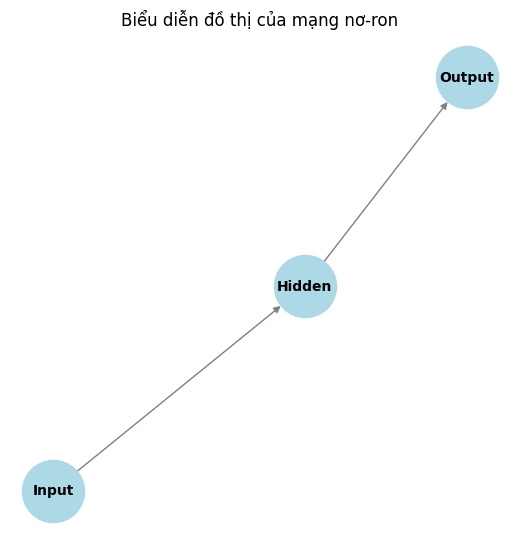

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Tạo Feature Matrix
np.random.seed(42)
X = np.random.rand(1000, 5)  # 1000 mẫu, 5 đặc trưng (features)
y = (X.sum(axis=1) > 2.5).astype(int)  # Nhãn nhị phân

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hàm kích hoạt sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Xây dựng mô hình mạng nơ-ron đơn giản
def simple_neural_network(X, weights):
    layer_input = np.dot(X, weights["w1"]) + weights["b1"]
    hidden_output = sigmoid(layer_input)
    final_input = np.dot(hidden_output, weights["w2"]) + weights["b2"]
    final_output = sigmoid(final_input)
    return final_output

# Khởi tạo trọng số
weights = {
    "w1": np.random.randn(5, 8),
    "b1": np.zeros(8),
    "w2": np.random.randn(8, 1),
    "b2": np.zeros(1)
}

# Chạy mô hình
output = simple_neural_network(X_test, weights)
print("Output dự đoán:", output[:5])

# Biểu diễn đồ thị mạng nơ-ron
G = nx.DiGraph()
G.add_edges_from([("Input", "Hidden"), ("Hidden", "Output")])
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10, font_weight='bold', arrows=True)
plt.title("Biểu diễn đồ thị của mạng nơ-ron")
plt.show()
